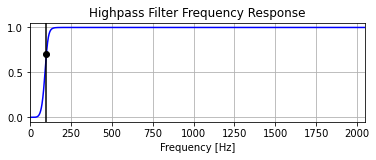

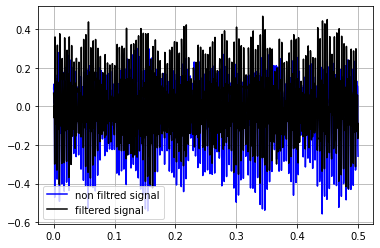

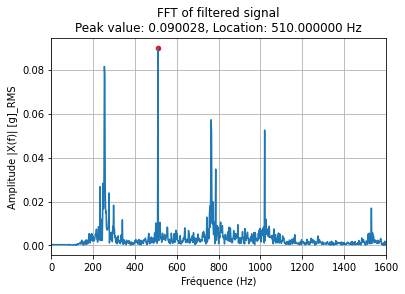

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from numpy.fft import fft, fftfreq

# read csv file and stored it in vibration_data

vibration_data = pd.read_csv("C:/Users/Angeleco/Desktop/Projet Prisca et Masa'il/Global TEMPOREL Z [5062] 2022_8_11_18_52_33_271.csv", sep = ";" , skiprows = 1)



# create  waveform data

x1=vibration_data["time[ms]"]/1000
y1=vibration_data[" amplitude[g]"]

#create lowpass filter
    
def butter_highpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(y1, cutoff, fs, order=5): 
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    y = signal.lfilter(b, a, y1)
    return y 

# Filter requirements input values.
order = 6
fs = 4096.0       # sample rate, Hz
cutoff = 100  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.

b, a = butter_highpass(cutoff, fs, order)

# Plot the filter frequency response.

w, h = freqz(b, a, worN=2048)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Highpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

#Apply the filter on data y1. 
    
y = highpass_filter(y1, cutoff, fs, order=6)


#Plot the original signal and the filtered signal
plt.figure
plt.plot(x1, y1, 'b')
plt.plot(x1, y, 'k')
plt.legend(('non filtred signal', 'filtered signal'), loc='best')
plt.grid(True)
plt.show()

# create FFT of filtered signal
N=y.size # Number of samples

Duration =0.5 # Length of the wavwform in second(Duration)
Te = 1/4096 # Sampling time

X = fft(y)  # Fast Fourier Transform

freq = fftfreq(y.size, 1/4096)  # Fast Fourier Transform Frequency

# Take only positif absolute value and  normalisation

X_abs = np.abs(X[:N//2])*2.0/N

freq_pos = freq[:N//2]

peakX = np.max(X_abs) # Find max peak

locX = np.argmax(X_abs) # Find its location

freq_posX = freq_pos[locX] # Get the actual frequency value

# New - Plot the max point
plt.plot(freq_posX, peakX, 'r.', markersize=9)

# New - Make title reflecting peak information
plt.title('FFT of filtered signal'+ '\n' + 'Peak value: %f, Location: %f Hz' % (peakX, freq_posX))


# Creation of FFT plot for positif frequency

fig = plt.figure(1)
freq_pos = freq[:N//2]
plt.plot(freq_pos, X_abs, label="Amplitude absolue")
plt.xlim(0, 1600)  # zoom frequency
plt.grid()
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude |X(f)| [g]_RMS")

plt.show()
fig.savefig("Spectre FFT")

In [2]:
data.shape

(2048, 3)

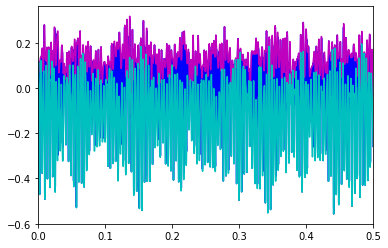

In [4]:
from scipy import interpolate
from scipy.interpolate import interp1d
def get_envelope_v1(x, y):
    x_list, y_list = list(x), list(y)
    assert len(x_list) == len(y_list)
    
    # First data
    ui, ux, uy = [0], [x_list[0]], [y_list[0]]
    li, lx, ly = [0], [x_list[0]], [y_list[0]]

    # Find upper peaks and lower peaks
    for i in range(1, len(x_list)-1):
        if y_list[i] >= y_list[i-1] and y_list[i] >= y_list[i+1]:
            ui.append(i)
            ux.append(x_list[i])
            uy.append(y_list[i])
        if y_list[i] <= y_list[i-1] and y_list[i] <= y_list[i+1]:
            li.append(i)
            lx.append(x_list[i])
            ly.append(y_list[i])

    # Last data
    ui.append(len(x_list)-1)
    ux.append(x_list[-1])
    uy.append(y_list[-1])
    li.append(len(y_list)-1)
    lx.append(x_list[-1])
    ly.append(y_list[-1])  

    if len(ux) == 2 or len(lx) == 2:
        return [], []
    
    else:
        func_ub = interp1d(ux, uy, kind='cubic', bounds_error=False)
        func_lb = interp1d(lx, ly, kind='cubic', bounds_error=False)

        ub, lb = [], []
        for i in x_list:
            ub = func_ub(x_list)
            lb = func_lb(x_list)

        ub = np.array([y, ub]).max(axis=0)
        lb = np.array([y, lb]).min(axis=0)

        return ub, lb
uy, ly = get_envelope_v1(x1, y1)

fig, ax = plt.subplots()
ax.plot(x1, y1, c="b")
ax.plot(x1, uy, c="m")
ax.plot(x1, ly, c="c")
ax.set_xlim(0, 0.5)
plt.show()

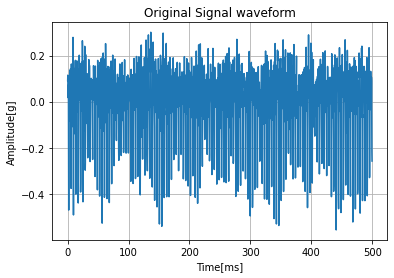

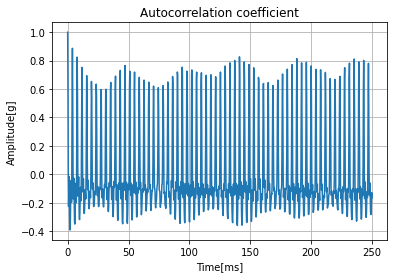

In [6]:
# Autocorrelation function calculation

df = vibration_data[" amplitude[g]"]
N= len(df)
y=[]
for j in range(0,(int(N/2)+1)):
    R=0    
    for i in range(0,(int(N/2))):
        R = R+ df[i]*df[i+j]
    y.append(R*2/N)
    
# Autocorrelation coefficient calculation

df = pd.DataFrame(y)
df.columns =['R']
R0=df.iloc[0,0]
R0
df['A'] = df['R']/R0
dt = vibration_data["time[ms]"]
t=[]
for i in range(len(df)):
    t.append(dt[i])
    
df['t']=t
# Plot waveform signal
fig = plt.figure(0)
x=vibration_data["time[ms]"]
y=vibration_data[" amplitude[g]"]
plt.plot(x,y)
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[g]")
plt.title("Original Signal waveform")
fig.savefig("Signal wave form.png")
plt.grid()
# Plot figure of Autocorrelation coefficient
fig1 = plt.figure(1)
x1=df["t"]
y1=df["A"]
plt.plot(x1,y1)
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[g]")
plt.title("Autocorrelation coefficient")
fig1.savefig("Autocorrelation coefficient.png")
plt.grid()